# Comparison of Raw vs Processed Physiological Signals

This notebook compares raw and preprocessed signal data using:
1. Visual inspection (line + box plot)
2. Statistical metrics (MSE, correlation, DTW)
3. Spectral analysis (Power Spectral Density)

These comparisons help verify that the preprocessing pipeline retains the integrity of the physiological signals.


In [23]:
import sys
from pathlib import Path

# Add the ../scripts directory to Python path
scripts_path = Path("..") / "scripts"
sys.path.append(str(scripts_path))
import pandas as pd
from compare_signals_robust import compare_visuals, compare_stats, compare_spectrum, align_dataframes, compare_visuals_debug, compare_visuals_fixed,diagnose_signal_data

# Load your preprocessed and raw datasets
df_raw = pd.read_csv("../data/test/participant_5C_merged.csv", parse_dates=['timestamp'])
df_processed = pd.read_csv("../data/hrv/participant_5C_merged.csv", parse_dates=['timestamp'])


In [7]:
print("Raw duplicated index:", df_raw.index.duplicated().sum())
print("Processed duplicated index:", df_processed.index.duplicated().sum())


Raw duplicated index: 0
Processed duplicated index: 0


In [8]:
# Align Dataframes
df_raw_aligned, df_proc_aligned = align_dataframes(df_raw, df_processed)

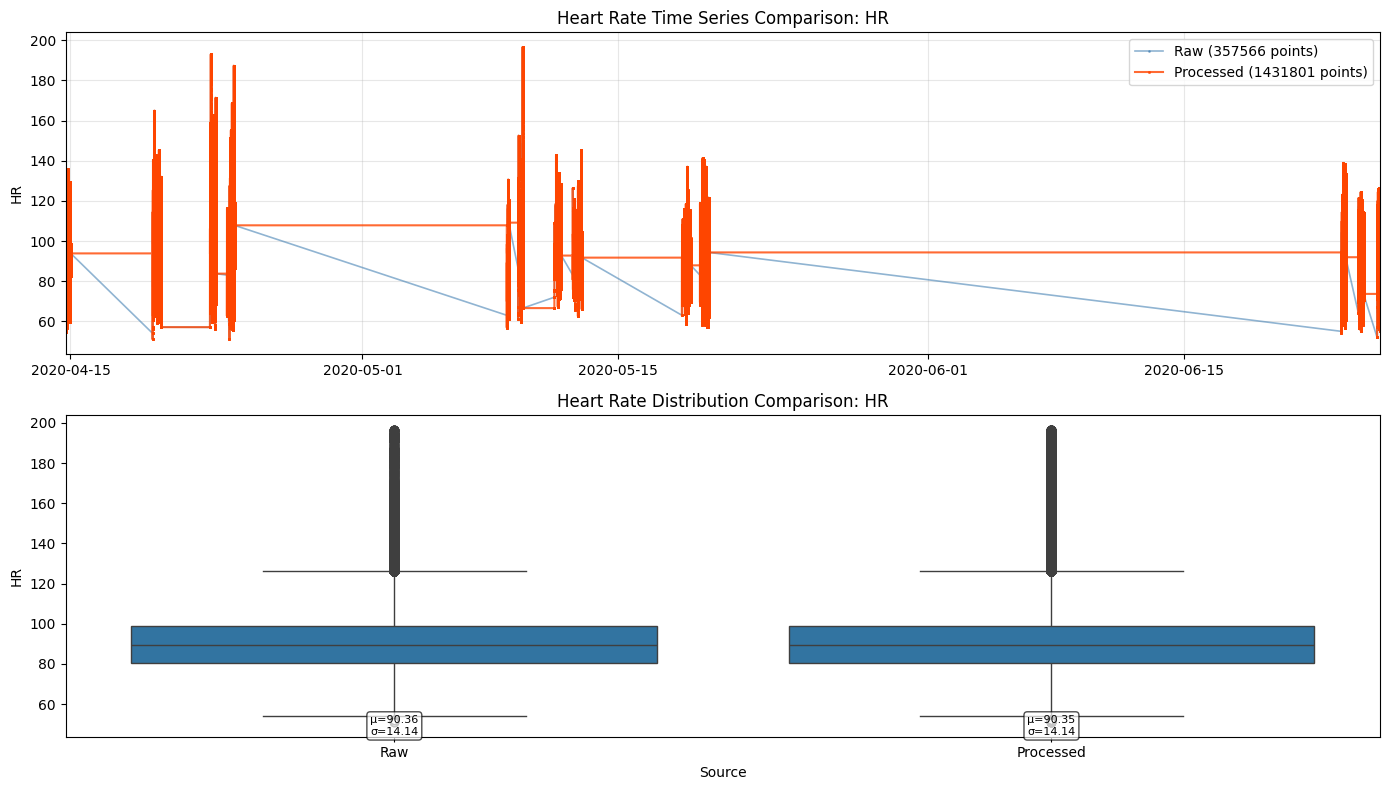

In [22]:
# Visual Comparisons
compare_visuals_fixed(df_raw_aligned, df_proc_aligned, feature='HR', title_prefix='Heart Rate')

In [16]:
# Statistical Comparison
results = compare_stats(df_raw_aligned, df_proc_aligned, feature='EDA')
print(results)

{'MSE': 0.2178062967862561, 'Pearson Correlation': np.float64(0.9744916328005321)}


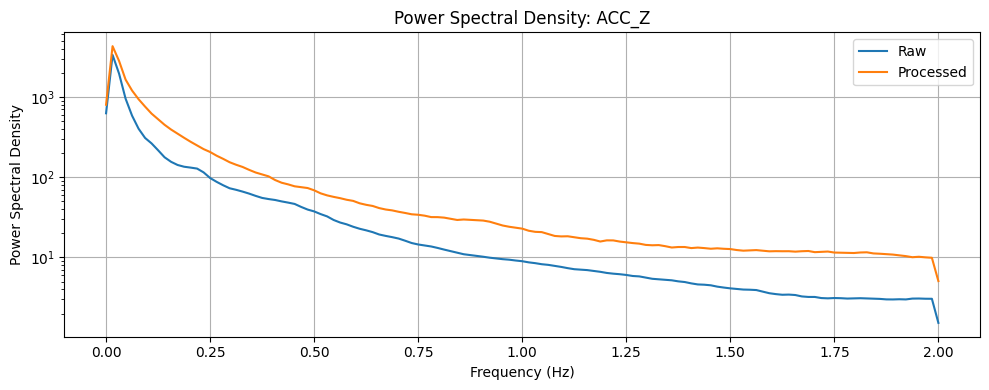

In [17]:
# Spectral Analysis
compare_spectrum(df_raw_aligned, df_proc_aligned, feature='ACC_Z', fs=4)